In [1]:
import numpy as np, os
import pandas as pd
from sklearn.datasets import make_biclusters, make_blobs
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from libs import load_mat
import matplotlib.pyplot as plt
from libs import create_noise

In [2]:
datasets = ['heart','german','breast_cancer','diabetis','thyroid','image','banana']
X,y = load_mat('heart')
X,y = shuffle(X,y)
X.shape,np.unique(y,return_counts=True)

((270, 13), (array([0, 1]), array([150, 120])))

In [3]:
N = 50
mask = np.ones(y.shape,'bool')
good = np.zeros(y.shape)
poo = None
for i in range(N):
    #print(mask.sum())
    good[mask] += 1
    M = SVC(probability=True).fit(X[mask],y[mask])
    P = M.predict_proba(X)
    Ps = np.ones(y.shape)
    Ps[y==1] = P[y==1,1]
    Ps[y==0] = P[y==0,0]
    unfit = np.argwhere(np.argmax(P,1)!=y).reshape(-1)
    assert np.all(Ps[unfit]<=.5)
    mask = np.random.binomial(1,Ps).astype('bool')

43


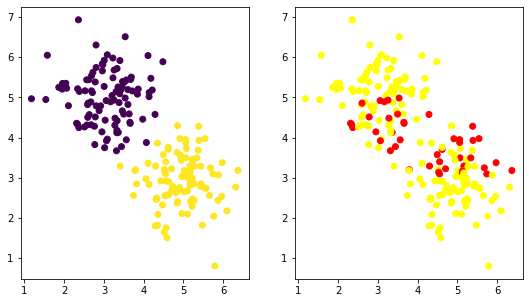

In [4]:
cov = [[.4,0],[0,.4]]
X1 = np.random.multivariate_normal([3,5],cov,100)
X2 = np.random.multivariate_normal([5,3],cov,100)
X,y = np.concatenate([X1,X2],axis=0),np.concatenate([np.zeros(100),np.ones(100)],axis=0)
idx = (3<X[:,1]) & (X[:,1]<5)
corr = np.random.binomial(1,idx*.4).astype('bool')
print(corr.sum())
f,(ax1,ax2) = plt.subplots(ncols=2,figsize=(9,5))
ax1.scatter(X[:,0],X[:,1],c=y);
ax2.scatter(X[:,0],X[:,1],c=corr,cmap='autumn_r');

In [5]:
yn = y.copy()
yn[corr] = 1 - y[corr]
print((y==yn).sum()/len(y))
lr = LogisticRegression(penalty='none').fit(X,yn)

0.785


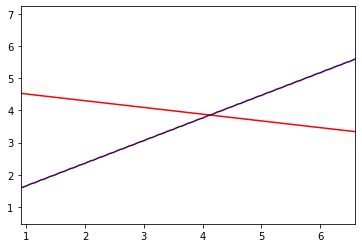

In [23]:
xx,yy = np.meshgrid(np.arange(*ax1.get_xlim(),.05),np.arange(*ax1.get_ylim(),.05))
Zn = LogisticRegression(penalty='none').fit(X,yn).predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
Z = LogisticRegression(penalty='none').fit(X,y).predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
plt.contour(xx,yy,Zn,levels=[.5], cmap="autumn");
plt.contour(xx,yy,Z,levels=[.5]);

In [10]:
Z

array([[9.99910278e-01, 9.99908097e-01, 9.99905864e-01, ...,
        9.98680202e-01, 9.98648166e-01, 9.98615353e-01],
       [9.99899339e-01, 9.99896893e-01, 9.99894387e-01, ...,
        9.98519517e-01, 9.98483587e-01, 9.98446786e-01],
       [9.99887067e-01, 9.99884322e-01, 9.99881511e-01, ...,
        9.98339302e-01, 9.98299005e-01, 9.98257733e-01],
       ...,
       [2.51493881e-03, 2.45540704e-03, 2.39728108e-03, ...,
        1.71160721e-04, 1.67099837e-04, 1.63135284e-04],
       [2.24223136e-03, 2.18914075e-03, 2.13730451e-03, ...,
        1.52562033e-04, 1.48942348e-04, 1.45408530e-04],
       [1.99903569e-03, 1.95169210e-03, 1.90546762e-03, ...,
        1.35984043e-04, 1.32757635e-04, 1.29607768e-04]])